In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Basic Graph

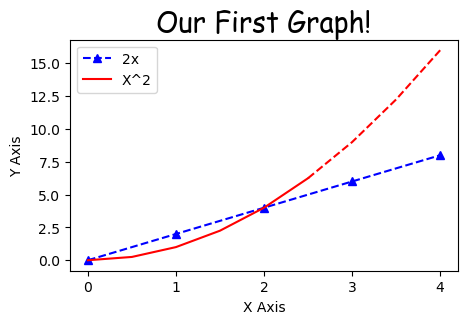

In [3]:
x=[0,1,2,3,4]
y=[0,2,4,6,8]

#Resize Graph
plt.figure(figsize=(5,3), dpi=100)

# line 1

#Keyword Argument Notation
#plt.plot(x,y, label='2x', color = 'red', linewidth = 2, marker='.',linestyle='--',markersize=10, markeredgecolor ='blue')

# Shorthand notation
#fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--',label='2x')

##line2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)
#print(x2)

#plot part of the graph as a line
plt.plot(x2[:6],x2[:6]**2, 'r', label = 'X^2')

#plot remainder of the graph as a dot
plt.plot(x2[5:],x2[5:]**2, 'r--')

#Add a title (specify font paramenters with fontdict)
plt.title("Our First Graph!",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

# X and Y labels 
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

#X, Y axis Tickmmarks(scale of your graph)
plt.xticks([0,1,2,3,4])
#plt.yticks([0,2,4,6,8])

#Add a legend
plt.legend()

#Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

#Show plot
plt.show()

### Bar Chart

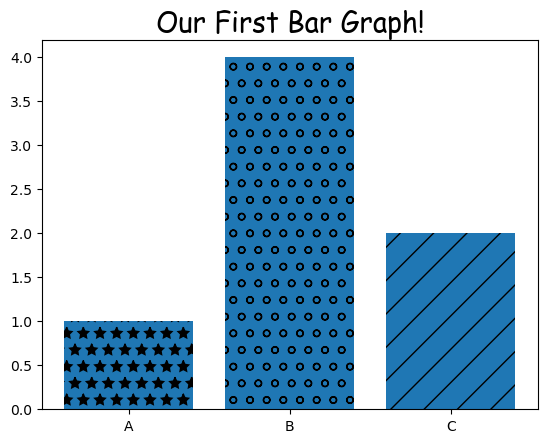

<Figure size 600x400 with 0 Axes>

In [66]:
labels = ['A', 'B', 'C']
values = [1,4,2]

bars = plt.bar(labels,values)

#Add a title (specify font paramenters with fontdict)
plt.title("Our First Bar Graph!",fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})

#Add patterns into the bars
#bars[0].set_hatch('/')
#bars[1].set_hatch('o')
#bars[2].set_hatch('*')

#Add patterns more neater
patterns = ['/','o','*']
for bar in bars:
    bar.set_hatch(patterns.pop())

plt.figure(figsize=(6,4))

plt.show()

### Real World Examples

In [67]:
# Data download (https://github.com/KeithGalli/matplotlib_tutorial)

## Line Graph

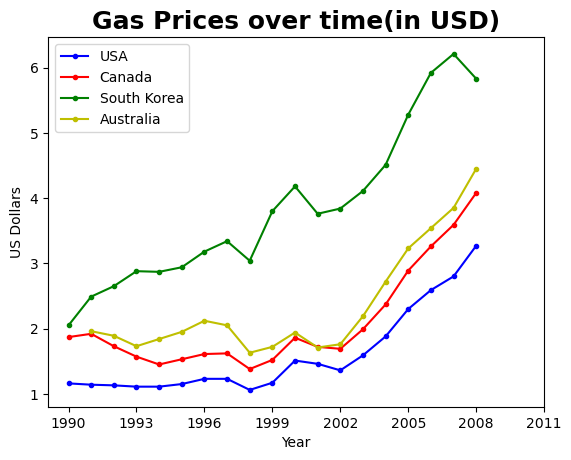

In [103]:
gas = pd.read_csv('gas_prices.csv')

plt.title('Gas Prices over time(in USD)', fontdict={'fontweight':'bold', 'fontsize': '18'})

plt.plot(gas.Year, gas.USA,'b.-', label='USA')
plt.plot(gas.Year, gas.Canada,'r.-', label='Canada')
plt.plot(gas.Year, gas['South Korea'],'g.-', label = 'South Korea')
plt.plot(gas.Year, gas.Australia,'y.-', label='Australia')

#Another way to plot many values!
#countries_to_look_at = ['Australia','USA','Canada','South Korea']
#for country in gas:
 #   if country in countries_to_look_at:
   # if country != 'Year':
  #      plt.plot(gas.Year,gas[country], marker='.')

#print(gas.Year[::3])

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure.png',dpi=300)

plt.show()

### Load FIFA Data

fifa =pd.read_csv('fifa_data.csv')

fifa.head(5)

### Histograms

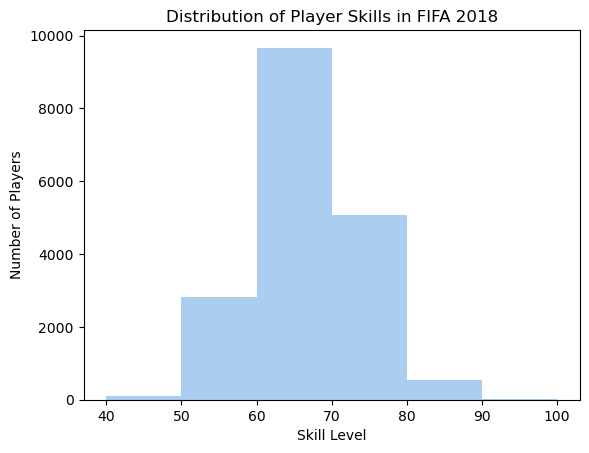

In [114]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins = bins, color ='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.show()

### Pie Charts

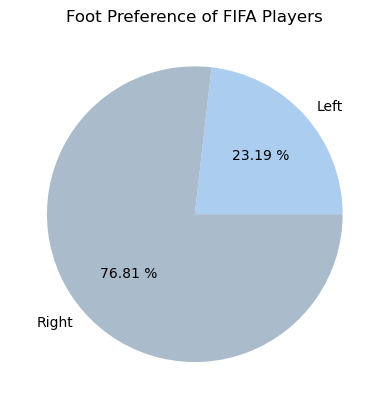

In [130]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors= ['#abcdef', '#aabbcc']

plt.pie([left,right], labels = labels, colors = colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

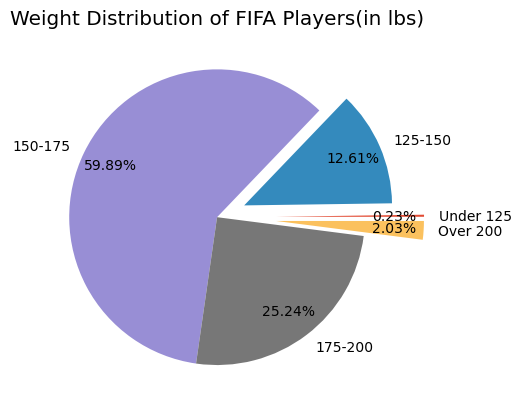

In [152]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight <125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

weights =[light, light_medium, medium, medium_heavy,heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode= (.4,.2,0,0,.4)

plt.title('Weight Distribution of FIFA Players(in lbs)')

plt.pie(weights, labels=labels, autopct='%.2f%%',pctdistance = 0.8, explode=explode)

plt.show()


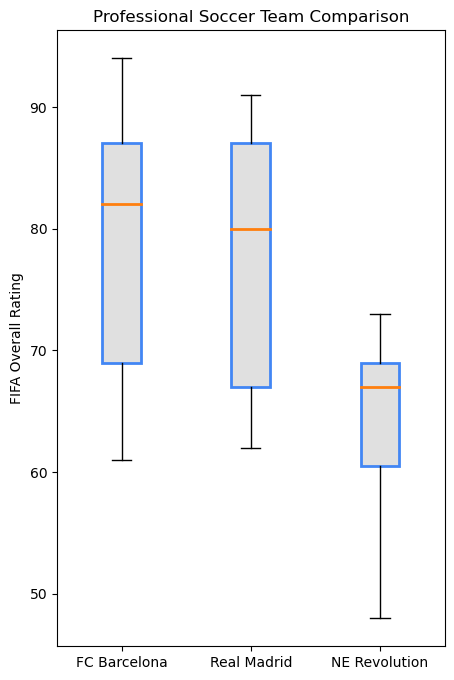

In [176]:
plt.style.use('default')

plt.figure(figsize=(5,8))

barcelona=fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid=fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs=fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels=['FC Barcelona', 'Real Madrid', 'NE Revolution']

boxes = plt.boxplot([barcelona,madrid,revs], labels=labels, patch_artist=True, medianprops= {'linewidth':2})

for box in boxes['boxes']:
    #set edge color
    box.set(color= '#4286f4', linewidth=2)
    
    #change fill color
    box.set(facecolor='#e0e0e0')

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')


plt.show()